                           Medical Cost Personal Insurance Project

# Importing the required library

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
import seaborn as sns

In [2]:
#improting the data and cheaking the values
cost_insurance = pd.read_csv("https://github.com/FlipRoboTechnologies/ML-Datasets/blob/main/Medical%20Cost%20Insurance/medical_cost_insurance.csv?raw=True")
cost_insurance.head(10)

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
5,31,female,25.740,0,no,southeast,3756.62160
6,46,female,33.440,1,no,southeast,8240.58960
7,37,female,27.740,3,no,northwest,7281.50560
8,37,male,29.830,2,no,northeast,6406.41070
9,60,female,25.840,0,no,northwest,28923.13692


In [3]:
cost_insurance.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [4]:
cost_insurance.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [5]:
cost_insurance.shape

(1338, 7)

In [6]:
cost_insurance.dtypes

age           int64
sex          object
bmi         float64
children      int64
smoker       object
region       object
charges     float64
dtype: object

In [7]:
#for now am coverting the catoegiral datas into numerical datas for better predicitons
cost_insurance.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [8]:
#label Encoding 
from sklearn.preprocessing import LabelEncoder # for encoding the single column
from sklearn.preprocessing import OneHotEncoder#for encoding multiple columns at a same time
#Instantiate encoders
label_encoding = LabelEncoder()
# Fit and transform the data with OneHotEncoder
cost_insurance["sex"] = label_encoding.fit_transform(cost_insurance[ 'sex'])
cost_insurance["smoker"] = label_encoding.fit_transform(cost_insurance[ 'smoker'])
cost_insurance["region"] = label_encoding.fit_transform(cost_insurance[ 'region'])



In [9]:
cost_insurance

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,3,16884.92400
1,18,1,33.770,1,0,2,1725.55230
2,28,1,33.000,3,0,2,4449.46200
3,33,1,22.705,0,0,1,21984.47061
4,32,1,28.880,0,0,1,3866.85520
...,...,...,...,...,...,...,...
1333,50,1,30.970,3,0,1,10600.54830
1334,18,0,31.920,0,0,0,2205.98080
1335,18,0,36.850,0,0,2,1629.83350
1336,21,0,25.800,0,0,3,2007.94500


In [10]:
# 'standard_scalar'
standard_scalar = StandardScaler()
columns_to_standardize = ['age', 'bmi'] #for standarizing multiple columns at a same time
cost_insurance[columns_to_standardize] = standard_scalar.fit_transform(cost_insurance[columns_to_standardize])


In [11]:
cost_insurance.head()

,age,sex,bmi,children,smoker,region,charges
0,-1.438764,0,-0.453320,0,1,3,16884.92400
1,-1.509965,1,0.509621,1,0,2,1725.55230
2,-0.797954,1,0.383307,3,0,2,4449.46200
3,-0.441948,1,-1.305531,0,0,1,21984.47061
4,-0.513149,1,-0.292556,0,0,1,3866.85520


In [12]:
#now we look for the correlations
cost_insurance.corr()

,age,sex,bmi,children,smoker,region,charges
age,1.000000,-0.020856,0.109272,0.042469,-0.025019,0.002127,0.299008
sex,-0.020856,1.000000,0.046371,0.017163,0.076185,0.004588,0.057292
bmi,0.109272,0.046371,1.000000,0.012759,0.003750,0.157566,0.198341
children,0.042469,0.017163,0.012759,1.000000,0.007673,0.016569,0.067998
smoker,-0.025019,0.076185,0.003750,0.007673,1.000000,-0.002181,0.787251
region,0.002127,0.004588,0.157566,0.016569,-0.002181,1.000000,-0.006208
charges,0.299008,0.057292,0.198341,0.067998,0.787251,-0.006208,1.000000


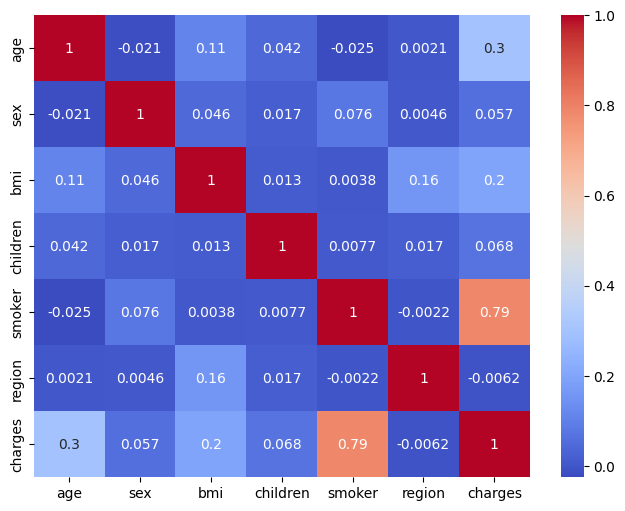

In [13]:
#ploting the heatmap for the bettter understandment of the correlation
corr_matrix = cost_insurance[['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges']].corr()

plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.show()

<Figure size 1000x800 with 0 Axes>

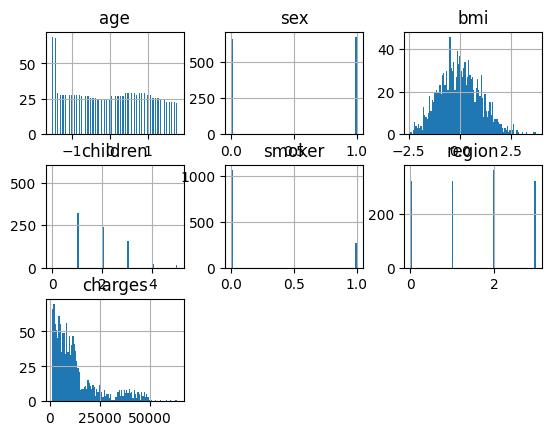

In [14]:
plt.figure(figsize = (10, 8))
cost_insurance.hist(bins = 100)
plt.show()

<Figure size 640x480 with 0 Axes>

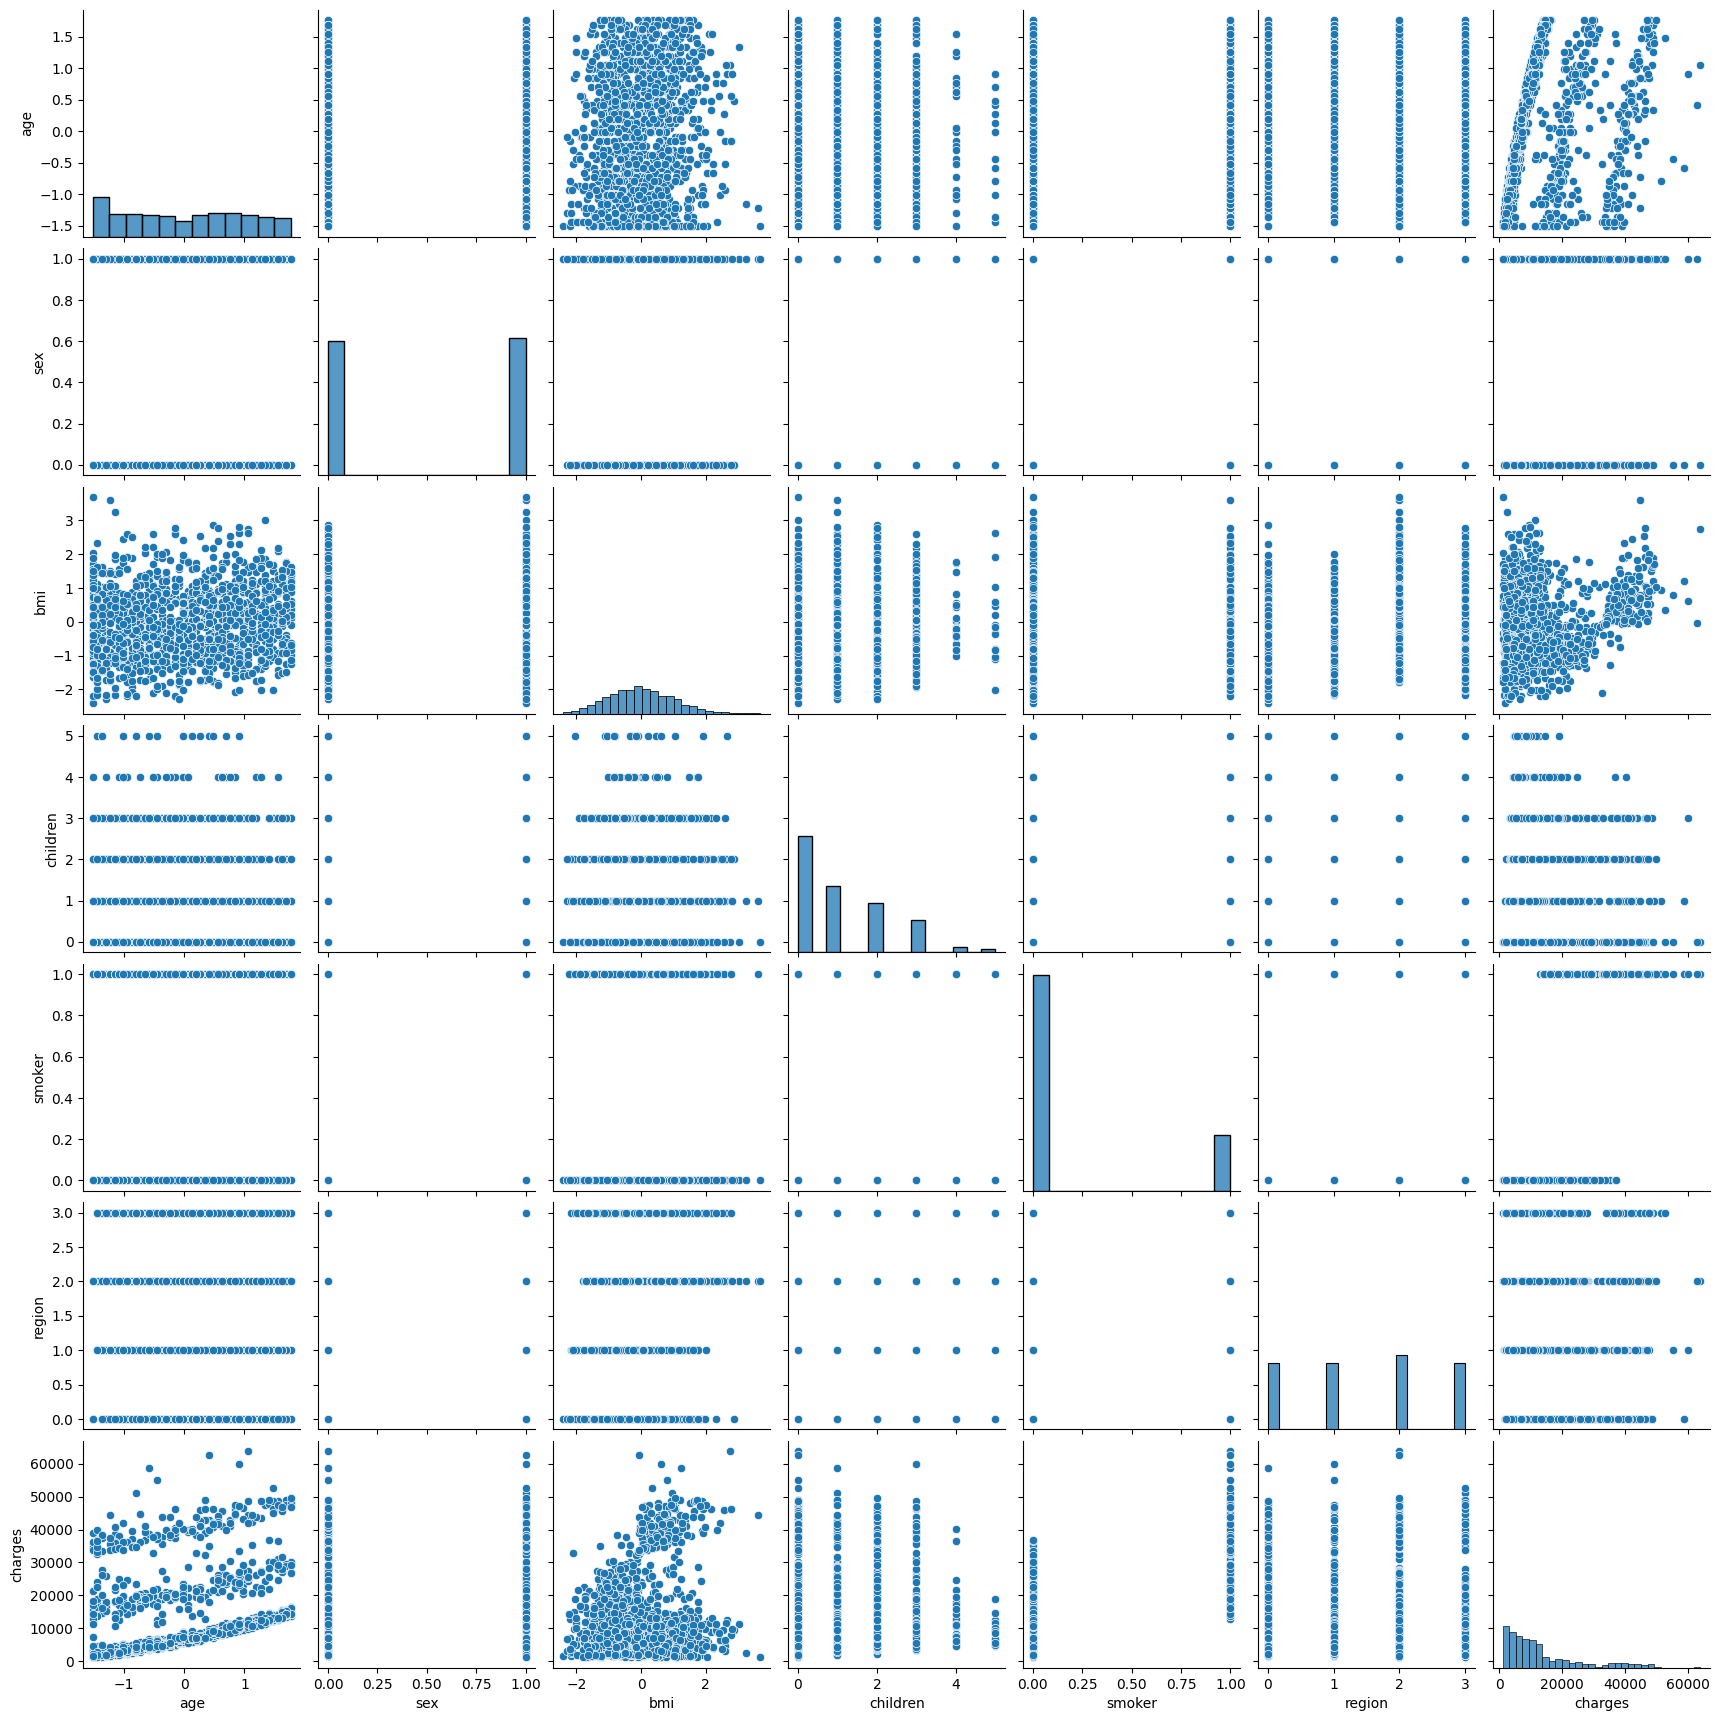

In [15]:
plt.figure(constrained_layout=True)
sns.pairplot(cost_insurance)
plt.show()

In [16]:
#spliting the dataset into input and output variable
x = cost_insurance.drop(['charges'],axis = 1)
y = cost_insurance['charges']

In [17]:
x

,age,sex,bmi,children,smoker,region
0,-1.438764,0,-0.453320,0,1,3
1,-1.509965,1,0.509621,1,0,2
2,-0.797954,1,0.383307,3,0,2
3,-0.441948,1,-1.305531,0,0,1
4,-0.513149,1,-0.292556,0,0,1
...,...,...,...,...,...,...
1333,0.768473,1,0.050297,3,0,1
1334,-1.509965,0,0.206139,0,0,0
1335,-1.509965,0,1.014878,0,0,2
1336,-1.296362,0,-0.797813,0,0,3


In [18]:
y

0       16884.92400
1        1725.55230
2        4449.46200
3       21984.47061
4        3866.85520
           ...     
1333    10600.54830
1334     2205.98080
1335     1629.83350
1336     2007.94500
1337    29141.36030
Name: charges, Length: 1338, dtype: float64

In [19]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state = 2)

In [20]:
#importing the models for fit_cheak
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import RandomizedSearchCV

In [21]:
#selecting the best model for hyper parameter tunning
model_dict = { KNeighborsRegressor : KNeighborsRegressor() , LinearRegression : LinearRegression() , 
          GradientBoostingRegressor : GradientBoostingRegressor()  , RandomForestRegressor : RandomForestRegressor()
    
}

In [22]:
def models():
    for model_name,model in model_dict.items():
        model.fit(x_train , y_train)
        y_pred = model.predict(x_test)
        mse = mean_squared_error ( y_test, y_pred)
        print('mean_squared_error For ' , model_name , "is" , mse.round(2))

In [23]:
models()

mean_squared_error For  <class 'sklearn.neighbors._regression.KNeighborsRegressor'> is 57024505.76
mean_squared_error For  <class 'sklearn.linear_model._base.LinearRegression'> is 38364832.19
mean_squared_error For  <class 'sklearn.ensemble._gb.GradientBoostingRegressor'> is 19810636.25
mean_squared_error For  <class 'sklearn.ensemble._forest.RandomForestRegressor'> is 24743292.2


# Hyperparameter Tunning

In [50]:
#For the hyper parameter we will go with GradientBoost coz it got the lowest mse
model = GradientBoostingRegressor()

In [51]:
model.fit(x_train,y_train)

GradientBoostingRegressor()

In [55]:
param_grid = {
'loss': ['squared_error', 'huber', 'quantile'],
    'n_estimators': [100, 300, 500, 700, 1000],
    'max_depth': [3, 5, 7, 9, 11],
    'learning_rate': [0.01, 0.05, 0.1, 0.15, 0.2],
    'min_samples_leaf': [1, 2, 5, 10],
    'max_features': [None, 'sqrt', 'log2']
}



In [56]:
classifier = RandomizedSearchCV (model, param_grid ,cv = 5 , n_jobs=-1 , scoring='neg_mean_squared_error' )
classifier.fit(x_train,y_train)

RandomizedSearchCV(cv=5, estimator=GradientBoostingRegressor(), n_jobs=-1,
                   param_distributions={'learning_rate': [0.01, 0.05, 0.1, 0.15,
                                                          0.2],
                                        'loss': ['squared_error', 'huber',
                                                 'quantile'],
                                        'max_depth': [3, 5, 7, 9, 11],
                                        'max_features': [None, 'sqrt', 'log2'],
                                        'min_samples_leaf': [1, 2, 5, 10],
                                        'n_estimators': [100, 300, 500, 700,
                                                         1000]},
                   scoring='neg_mean_squared_error')

In [57]:
best_parameters = classifier.best_params_
best_parameters

{'n_estimators': 100,
 'min_samples_leaf': 10,
 'max_features': None,
 'max_depth': 5,
 'loss': 'huber',
 'learning_rate': 0.05}

In [60]:
best_parameters = {'n_estimators': 100,
 'min_samples_leaf': 10,
 'max_features': None,
 'max_depth': 5,
 'loss': 'huber',
 'learning_rate': 0.05}

best_parameters = GradientBoostingRegressor(**best_parameters)

In [61]:
#fitting and predicting the model
best_parameters.fit(x_train , y_train)
y_predict = best_parameters.predict(x_test)

In [62]:
#for the model evalution 
mse = mean_squared_error(y_test , y_predict)
mse.round(2)

19618760.82

# FOR Accurately Predict Insurance Costs

In [63]:
#new data are as follows
'''Age: 35 years
BMI: 28.5
Number of children: 1
Smoker: No (0 for non-smoker)
Region: Southwest (1 if in southwest region, 0 otherwise)
Region: Northeast (0 for not in northeast region)'''
    
new_data = [[35, 28.5, 1, 0, 1, 0]]
predicted_cost = model.predict(new_data)
print("Predicted insurance cost:", predicted_cost)



Predicted insurance cost: [48494.64460709]


C:\Users\adity\AppData\Roaming\Python\Python311\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but GradientBoostingRegressor was fitted with feature names
  warnings.warn(
